In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np

In [6]:
# fabian = list()
# for i in range(3):
#     df = pd.read_csv('~/Documents/training_set_1/fabian/%i/box_sizes.txt' % (i+1), names=['x','y','z'], sep=" ")
#     fabian.append(df)

jonas = list()
for i in [1,2,3,5]:
    df = pd.read_csv('~/Documents/training_set_1/jonas/%i/box_sizes.txt' % (i), names=['x','y','z'], sep=" ")
    df['label'] = str(i)
#     df.z += 0.02
    jonas.append(df)
jonas_all = pd.concat(jonas, ignore_index=True)

In [7]:
jonas_all

x      y      z label
0    0.227  0.238  0.159     1
1    0.234  0.246  0.158     1
2    0.220  0.247  0.156     1
3    0.222  0.247  0.158     1
4    0.230  0.238  0.157     1
..     ...    ...    ...   ...
197  0.090  0.110  0.066     5
198  0.088  0.114  0.065     5
199  0.092  0.110  0.067     5
200  0.089  0.102  0.065     5
201  0.095  0.102  0.066     5

[202 rows x 4 columns]

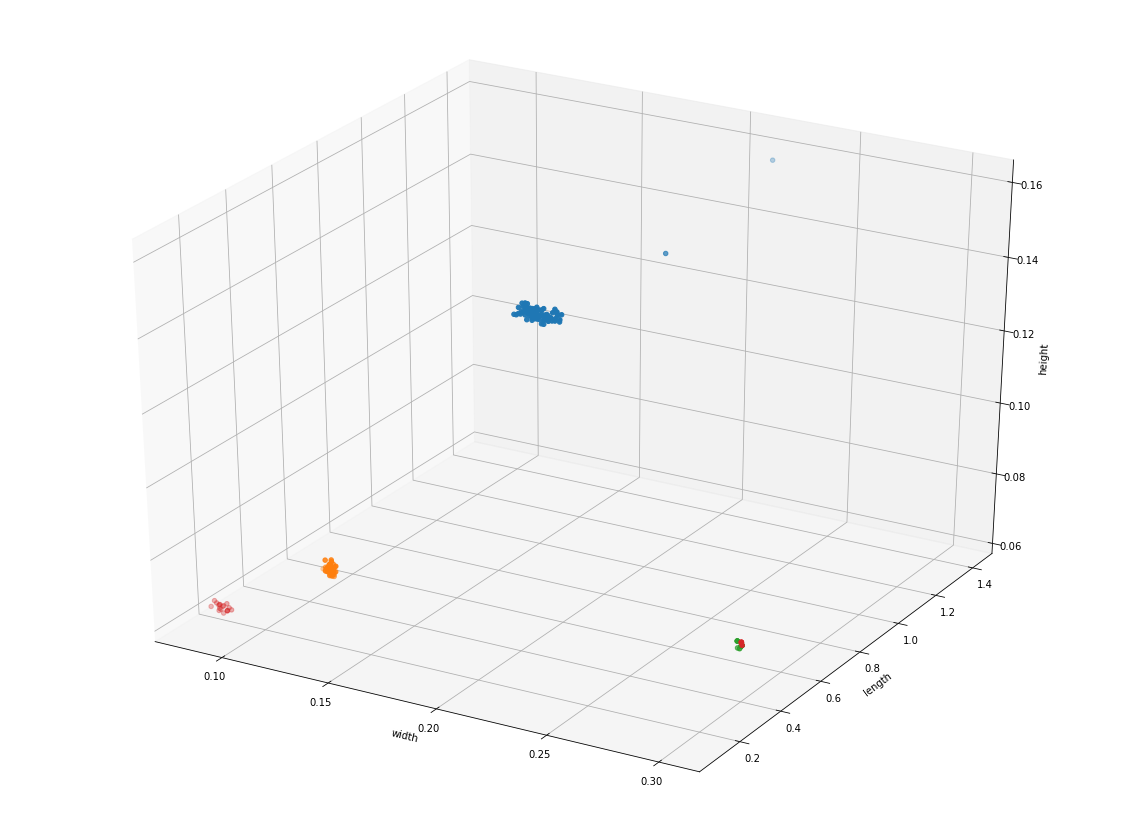

In [4]:
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111,projection='3d')

# for data in fabian[0]:
# for i in [0,1,2]:
#     data = fabian[i]
#     ax.scatter(data.x, data.y, data.z)
    
for i in [0,1,2,3]:
    data = jonas[i]
    ax.scatter(data.x, data.y, data.z)
    
ax.set_xlabel('width')
ax.set_ylabel('length')
ax.set_zlabel('height')

plt.show()


In [13]:
# jonas_all.to_numpy()[:,:3].shape
jonas_all['label']

0      1
1      1
2      1
3      1
4      1
      ..
197    5
198    5
199    5
200    5
201    5
Name: label, Length: 202, dtype: object

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knnc = KNeighborsClassifier(n_neighbors=10, weights="distance")

In [22]:
knnc.fit(jonas_all.to_numpy()[:,:3], jonas_all['label'])

KNeighborsClassifier(n_neighbors=10, weights='distance')

In [24]:
knnc.predict([[.23, .24, .16], [.09, .10, .06], [.2, .2, .2]])

array(['1', '5', '1'], dtype=object)